In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
from traffic_env import TrafficEnv

c:\Users\Lenovo\.conda\envs\rl_finals\lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


Episode 1/1000, Reward: 18610.10, Epsilon: 0.995
Episode 2/1000, Reward: 19615.20, Epsilon: 0.990
Episode 3/1000, Reward: 20117.10, Epsilon: 0.985
Episode 4/1000, Reward: 19265.50, Epsilon: 0.980
Episode 5/1000, Reward: 19468.00, Epsilon: 0.975
Episode 6/1000, Reward: 19113.00, Epsilon: 0.970
Episode 7/1000, Reward: 19916.80, Epsilon: 0.966
Episode 8/1000, Reward: 20438.70, Epsilon: 0.961
Episode 9/1000, Reward: 20111.30, Epsilon: 0.956
Episode 10/1000, Reward: 19626.50, Epsilon: 0.951
Episode 11/1000, Reward: 20260.50, Epsilon: 0.946
Episode 12/1000, Reward: 19250.60, Epsilon: 0.942
Episode 13/1000, Reward: 19803.70, Epsilon: 0.937
Episode 14/1000, Reward: 19956.20, Epsilon: 0.932
Episode 15/1000, Reward: 20426.90, Epsilon: 0.928
Episode 16/1000, Reward: 19799.30, Epsilon: 0.923
Episode 17/1000, Reward: 19995.90, Epsilon: 0.918
Episode 18/1000, Reward: 19971.50, Epsilon: 0.914
Episode 19/1000, Reward: 19691.70, Epsilon: 0.909
Episode 20/1000, Reward: 19943.60, Epsilon: 0.905
Episode 2

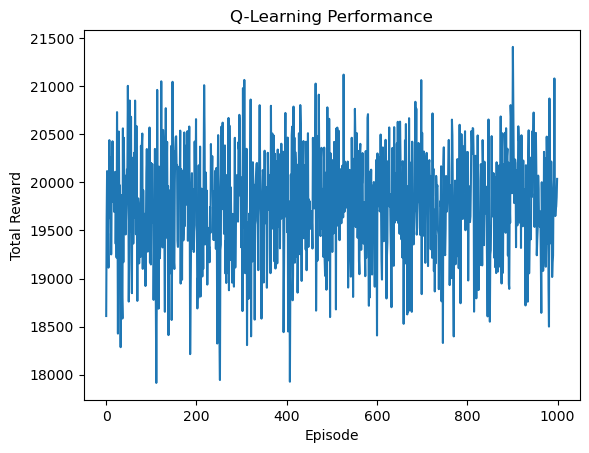

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from traffic_env import TrafficEnv  # make sure your env file name matches
import random

# === Initialize Environment ===
env = TrafficEnv(render_mode=False)

# === Q-learning Parameters ===
alpha = 0.1          # learning rate
gamma = 0.95         # discount factor
epsilon = 1.0        # exploration rate
epsilon_decay = 0.995
epsilon_min = 0.05
episodes = 1000

# === Discretization for continuous state ===
def discretize_state(state):
    # Round car counts and keep light flag
    return tuple(np.round(state[:4]).astype(int).clip(0, 10)) + (int(state[4]),)

# === Q-table ===
Q = {}

def get_q(state, action):
    return Q.get((state, action), 0.0)

def best_action(state):
    actions = [get_q(state, a) for a in range(env.action_space.n)]
    return int(np.argmax(actions))

# === Training Loop ===
rewards_per_episode = []

for ep in range(episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    total_reward = 0
    done = False

    while not done:
        # ε-greedy policy
        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = best_action(state)

        next_state, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)
        done = terminated or truncated

        # Q-learning update
        best_next_action = best_action(next_state)
        td_target = reward + gamma * get_q(next_state, best_next_action)
        td_error = td_target - get_q(state, action)
        Q[(state, action)] = get_q(state, action) + alpha * td_error

        state = next_state
        total_reward += (reward / 100)  # normalize reward

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_per_episode.append(total_reward)

    # if (ep + 1) % 50 == 0:
    print(f"Episode {ep+1}/{episodes}, Reward: {total_reward:.2f}, Epsilon: {epsilon:.3f}")

env.close()

# === Plot Rewards ===
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Performance')
plt.show()
